<h1 align="left"> xTech Coding Assignment | Use Case: Early Loan Closing prediction</h1>

This assignment consists of a data science project based on Python, which requires hands-on analysis and modelling. The assignment contains a series of tasks following the standard data science pipeline. Specifically, in this notebook you must explore data related to customer loans before building a classification model to predict if a customer will pay back and close their loan before the contract end date (STATUS = "EARLY EXPIRED").

You will be evaluated based on your coding ability, the quality of the generated insights, and the ability to justify choices.

Sections: <br>
[1 The Data](#1) <br>
[2 Evaluation](#2) <br>
[3 Assignment](#3)<br>


<a id='1'></a>
# 1) The Data


### Dataset *use_case_customer_data.csv*
9561 rows x 7 columns

Variables:
- **CUSTOMER_ID**: customer ID

- **SEX**: gender of the customer
    - M: MAN
    - W: WOMAN
    
- **AGE**: age of the customer

- **ANNUAL_INCOME**: annual salary value of the customer

- **NUMBER_OF_MONTHS**: number of months the salary is paid

- **MARITAL_STATUS**: marital status of the customer
    - D: DIVORCED
    - G: SINGLE
    - C: COHABITANT
    - J: CONJUGATE
    - S: SEPARATED
    - W: WIDOW(ER)
    - X: OTHER

- **LEASE**: type of customer lease
    - P: PROPERTY
    - E: AT THE EMPLOYER
    - R: RENT
    - A: PARENTS/RELATIVES
    - T: THIRD PARTIES
    - X: OTHER


### Dataset *use_case_loans_data.csv*
37291 rows x 12 variables

Variables:
- **CUSTOMER_ID**: customer ID

- **STATUS**: loan status (target)
    - CONCLUDED REGULARLY
    - EARLY EXPIRED (phenomenon of interest)

- **SECTOR_TYPE**: type of loan
    - CL: CAR LOAN
    - FL: FINALIZED LOAN
    - PL: PERSONAL LOAN

- **GOOD_VALUE**: value of the mortgaged property

- **ADVANCE_VALUE**: advance paid

- **LOAN_VALUE**: value of the loan

- **INSTALLMENT_VALUE**: value of the installment

- **NUMBER_INSTALLMENT**: number of installments

- **GAPR**: Gross Annual Percentage Rate

- **NIR**: Nominal Interest Rate 

- **REFINANCED**: loan subject to refinancing (Y / N)

- **FROM_REFINANCE**: loan from a refinancing (Y / N)





<a id='2'></a>
# 2) Evaluation 
Total points: **100 pts** (100%)

<br>

**I. Data Preparation: 15 pts (15%)** <br> 
a) Preparing the dataset: **10 pts**<br>
b) Dealing with missing values: **5 pts**<br> 

**II. Exploratory Data Analysis & Data Visualization: 20 pts (20%)**<br>
a) Analyzing Distributions: **10 pts**<br>
b) Analyzing Correlation: **10 pts**<br>

**III. Feature Engineering: 20 pts (20%)**<br>
a) Scaling and Distributing: **5 pts**<br>
b) Encoding categorical data: **5 pts**<br>
c) Dealing with Unbalanced Dataset: **10 pts**<br>

**IV. Modeling: 30 pts (30%)**<br>
a) Modeling with Classifiers (try at least 3 different): **20 pts**<br>
b) Tuning Parameter: **10 pts**<br>

**V. Evaluation: 10 pts (10%)**<br>
a) Evaluating with Confusion Matrix: **5 pts**<br>
a) Evaluating with other Metrics: **5 pts**<br>


**VI. Export Results: 5 pts (5%)**<br>
a) Export Model Results (Paramters and Performances): **5 pts**<br>


### Remember to import all necessary libraries (e.g. python, numpy, matplotlib, etc)

In [162]:
#import the required modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

<a id='3'></a>
# 3) Assignment

## I. Data Preparation

**a) Preparing the dataset**<br>

**b) Dealing with missing values**<br>



In [2]:
#read in the dataset
customer_df = pd.read_csv('C:/Users/FaithIbigbemi/Downloads/BIP xTech Coding Assignment - Data Science_202301/data/use_case_customer_data.csv')
loan_df = pd.read_csv('C:/Users/FaithIbigbemi/Downloads/BIP xTech Coding Assignment - Data Science_202301/data/use_case_loans_data.csv')

In [3]:
customer_df.head()

,CUSTOMER_ID,SEX,AGE,ANNUAL_INCOME,NUMBER_OF_MONTHS,MARITAL_STATUS,LEASE
0,1088,M,36,25200.00,14,J,P
1,1097,W,45,26610.78,14,J,P
2,1102,M,49,24700.00,13,J,P
3,1104,W,45,15951.00,13,J,P
4,1106,M,47,28114.45,13,J,P


In [4]:
loan_df.head()

,CUSTOMER_ID,STATUS,SECTOR_TYPE,GOOD_VALUE,ADVANCE_VALUE,LOAN_VALUE,INSTALLMENT_VALUE,NUMBER_INSTALLMENT,GAPR,NIR,REFINANCED,FROM_REFINANCE
0,1088,CONCLUDED REGULARLY,FL,469.00,69.0,400.00,44.45,10,21.74882,19.84123,N,N
1,1088,CONCLUDED REGULARLY,FL,794.30,0.0,794.30,70.00,12,9.42200,9.03804,N,N
2,1097,CONCLUDED REGULARLY,FL,399.00,0.0,419.00,69.85,6,8.19200,0.03800,N,N
3,1097,CONCLUDED REGULARLY,FL,1039.98,0.0,1039.98,52.00,20,0.00220,0.00220,N,N
4,1097,EARLY EXPIRED,CL,23500.00,3500.0,21387.86,310.00,84,6.72602,5.76090,Y,N


In [5]:
#carry out a left join on the two dataframes to produce one extensive dataframe. Join is performed on the common column 'customer id'
total_data = pd.merge(loan_df, customer_df, how="left", on=["CUSTOMER_ID"])

In [6]:
#confirm that the rows in the new dataframe is as expected
total_data.shape

(37291, 18)

### Dealing with Missing data

In [7]:
#examine how many columns contain missing data in the dataset
total_data.isnull().sum()

CUSTOMER_ID            0
STATUS                 0
SECTOR_TYPE            0
GOOD_VALUE             0
ADVANCE_VALUE          0
LOAN_VALUE             0
INSTALLMENT_VALUE      0
NUMBER_INSTALLMENT     0
GAPR                   0
NIR                    0
REFINANCED             0
FROM_REFINANCE         0
SEX                    0
AGE                    0
ANNUAL_INCOME          0
NUMBER_OF_MONTHS       0
MARITAL_STATUS        72
LEASE                  8
dtype: int64

In [8]:
# correct the missing data in the categorical field marital status by inputting the mode in the missing cells

marital_status_mode = total_data['MARITAL_STATUS'].mode()[0]
total_data['MARITAL_STATUS'] = total_data['MARITAL_STATUS'].fillna(marital_status_mode)

In [9]:
# correct the missing data in the categorical field lease by inputting the mode in the missing cells

lease_mode = total_data['LEASE'].mode()[0]
total_data['LEASE'] = total_data['LEASE'].fillna(lease_mode)

In [10]:
#examine the dataset after correcting missing data

total_data.isnull().sum()

CUSTOMER_ID           0
STATUS                0
SECTOR_TYPE           0
GOOD_VALUE            0
ADVANCE_VALUE         0
LOAN_VALUE            0
INSTALLMENT_VALUE     0
NUMBER_INSTALLMENT    0
GAPR                  0
NIR                   0
REFINANCED            0
FROM_REFINANCE        0
SEX                   0
AGE                   0
ANNUAL_INCOME         0
NUMBER_OF_MONTHS      0
MARITAL_STATUS        0
LEASE                 0
dtype: int64

## II. Exploratory Data Analysis & Data Visualization

**a) Analyzing Distributions**<br>
*hint: use histograms or the function `distplot` of the library `seaborn`*

**b) Analyzing Correlation**<br>
*hint: calculate the correlation matrix and then visualize it with the `heatmap` of the library `seaborn`*<br>



<AxesSubplot: xlabel='LEASE', ylabel='LOAN_VALUE'>

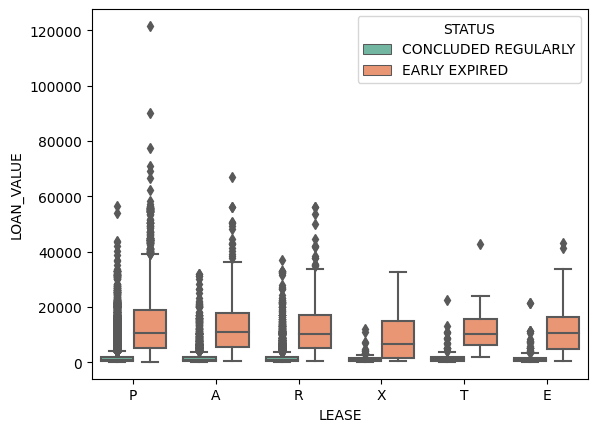

In [11]:
#explore the relationship between lease, loan value and status using a boxplot

sns.boxplot(x = total_data['LEASE'],
            y = total_data['LOAN_VALUE'],
            hue = total_data['STATUS'],
            palette = 'Set2')

<AxesSubplot: xlabel='REFINANCED', ylabel='LOAN_VALUE'>

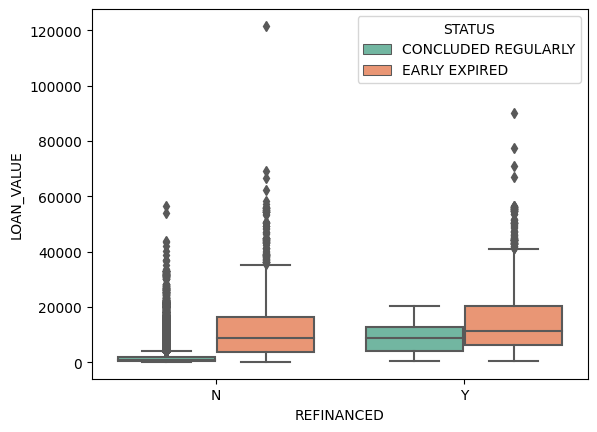

In [12]:
#explore the relationship between refinance, loan value and status using a boxplot

sns.boxplot(x = total_data['REFINANCED'],
            y = total_data['LOAN_VALUE'],
            hue = total_data['STATUS'],
            palette = 'Set2')

<AxesSubplot: xlabel='SECTOR_TYPE', ylabel='LOAN_VALUE'>

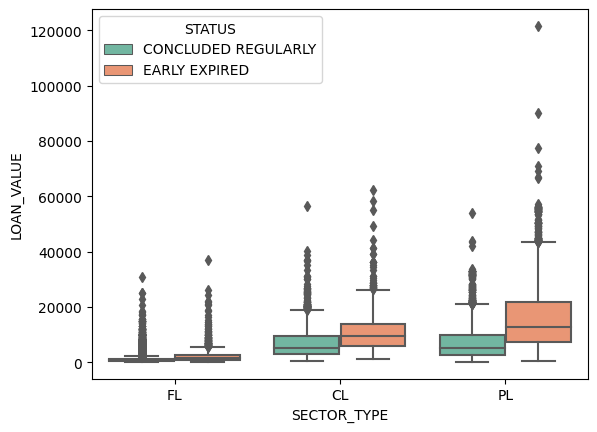

In [13]:
#explore the relationship between refinance, loan value and status using a boxplot

sns.boxplot(x = total_data['SECTOR_TYPE'],
            y = total_data['LOAN_VALUE'],
            hue = total_data['STATUS'],
            palette = 'Set2')

<AxesSubplot: xlabel='SECTOR_TYPE', ylabel='count'>

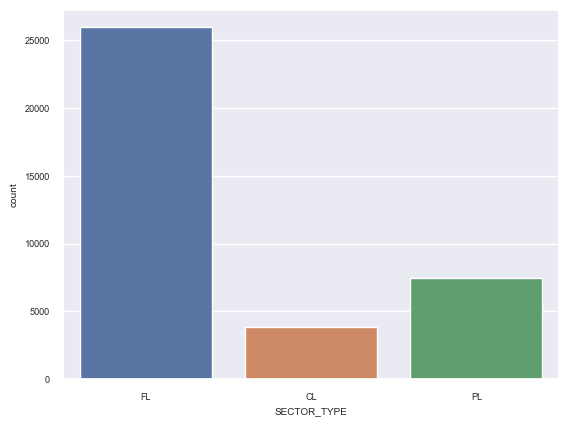

In [163]:
sns.countplot(total_data, x= 'SECTOR_TYPE')

### Analyze Distributions of the variables

In [14]:
#create a function for producing histograms

def create_histograms(df):
    for i in df.columns:
        if df[str(i)].dtypes == 'int64' or df[str(i)].dtypes == 'float64':
            sns.histplot(df[str(i)],kde = False)
            plt.show()

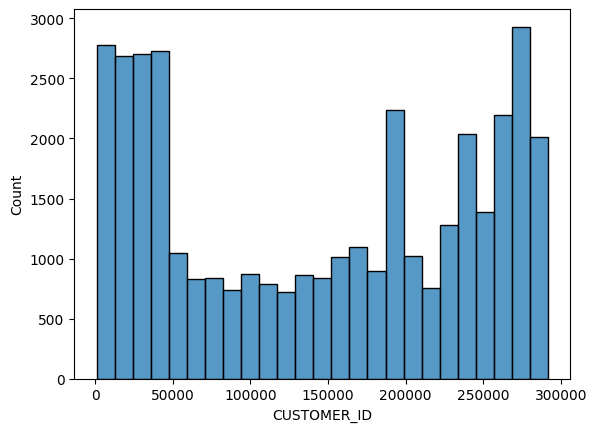

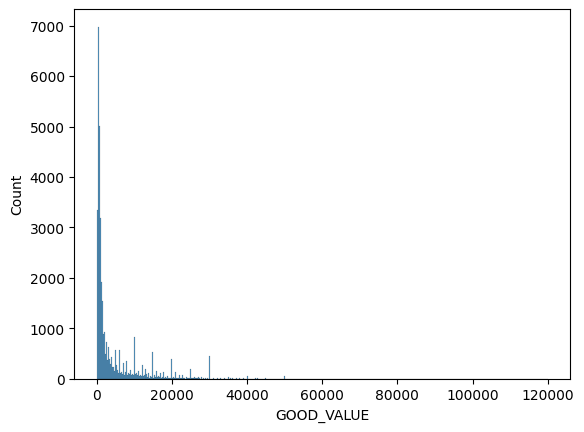

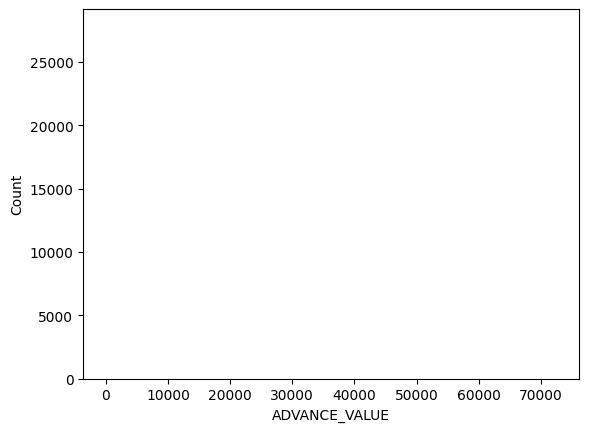

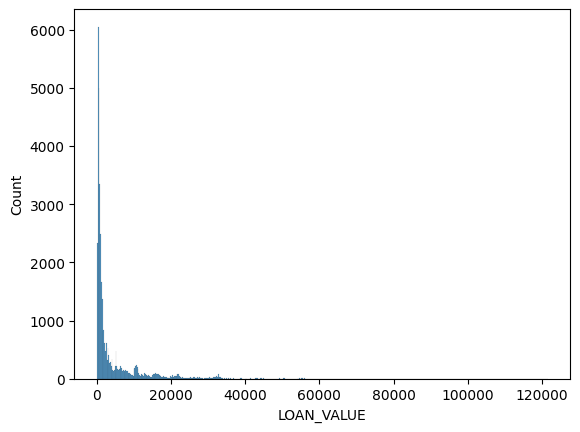

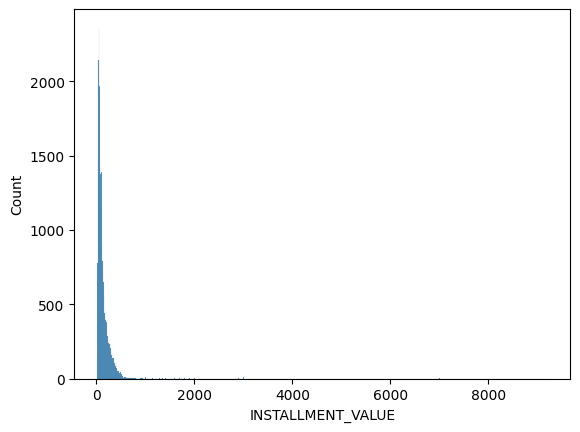

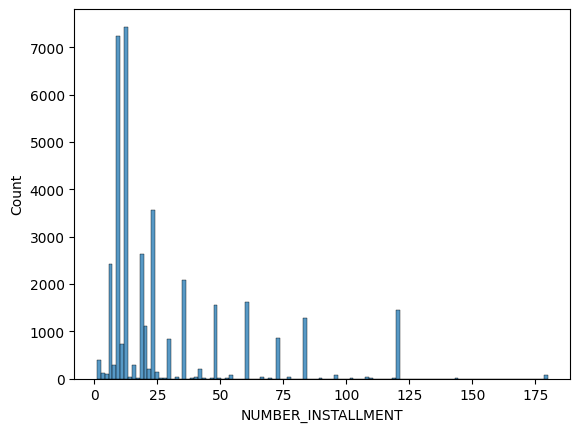

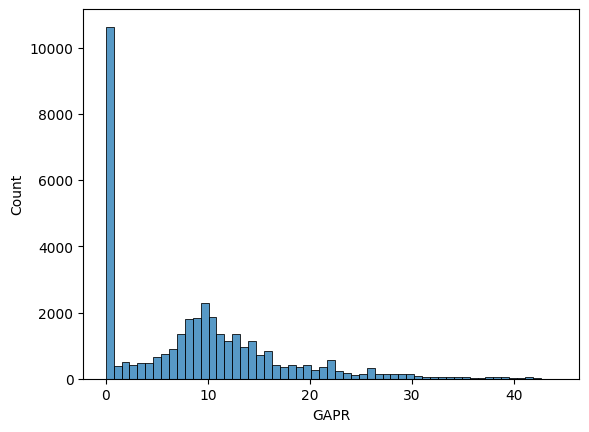

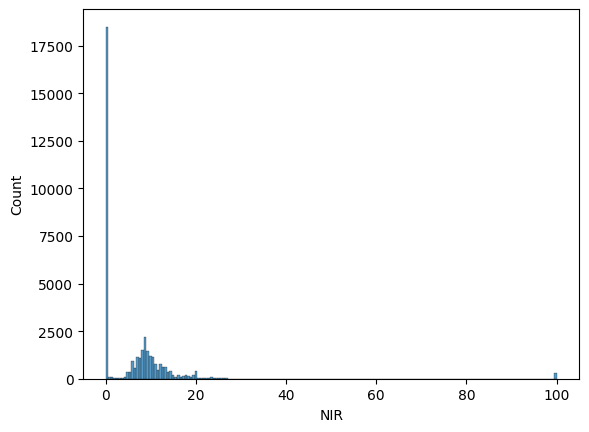

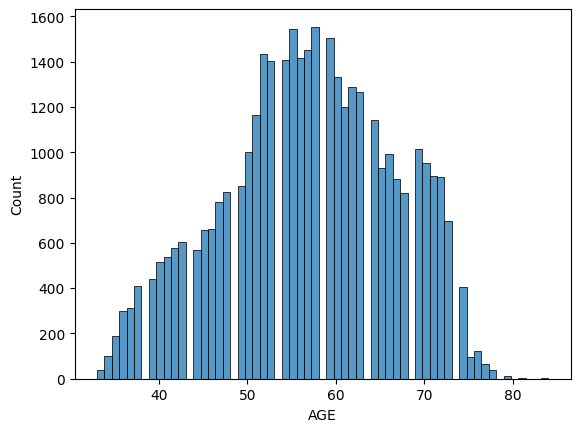

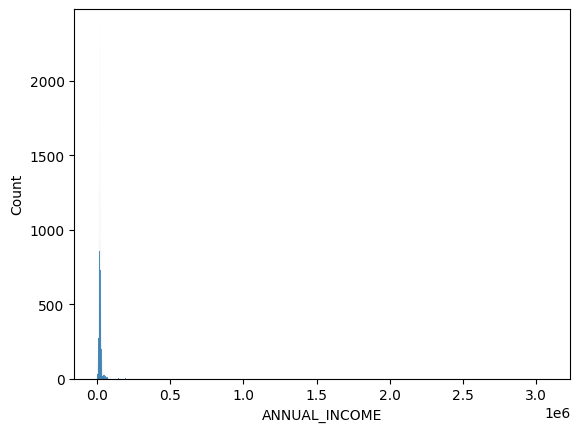

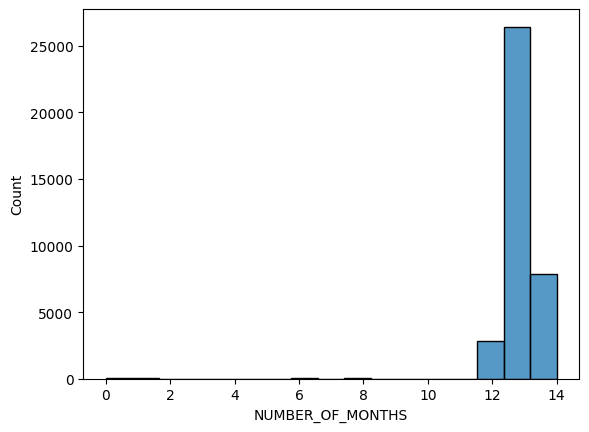

In [15]:
create_histograms(total_data)

### Analyze Correlations amongst the variables

C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\556561566.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(total_data.corr(), annot = True)


<AxesSubplot: >

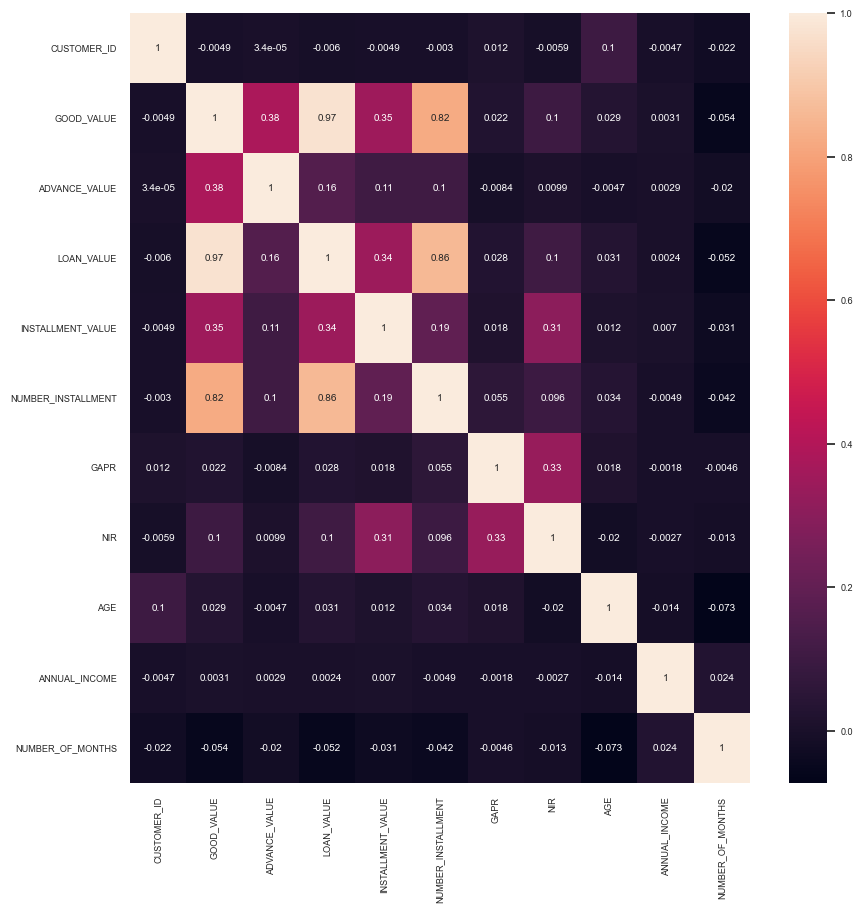

In [16]:
#check for correlation among the variables using a heatmap

plt.figure(figsize = (10,10))
sns.set(font_scale=0.6)
sns.heatmap(total_data.corr(), annot = True)


### Dealing with Outliers

Boxplot for CUSTOMER_ID


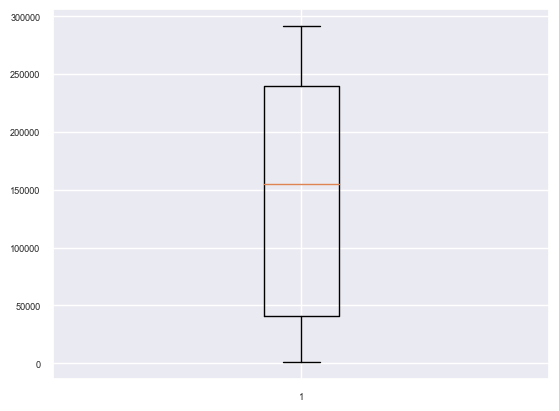

Boxplot for GOOD_VALUE


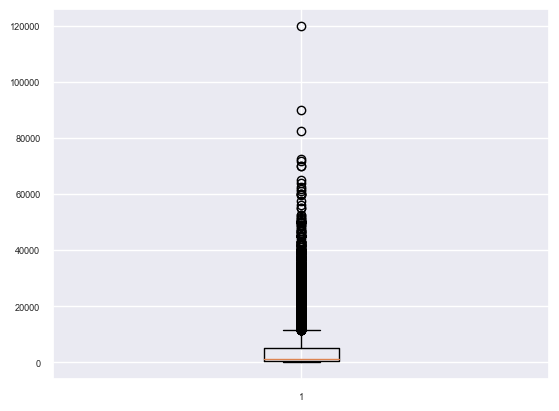

Boxplot for ADVANCE_VALUE


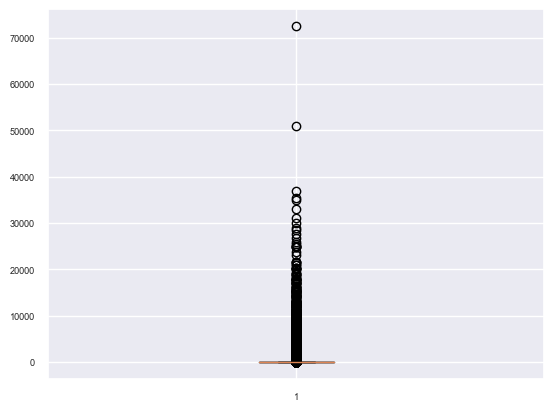

Boxplot for LOAN_VALUE


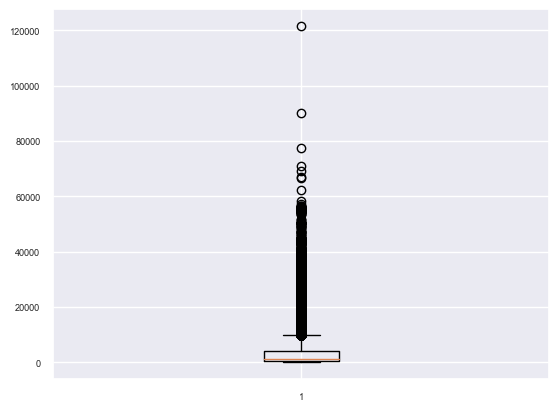

Boxplot for INSTALLMENT_VALUE


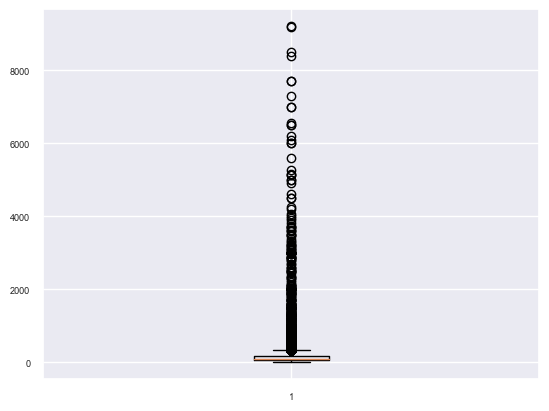

Boxplot for NUMBER_INSTALLMENT


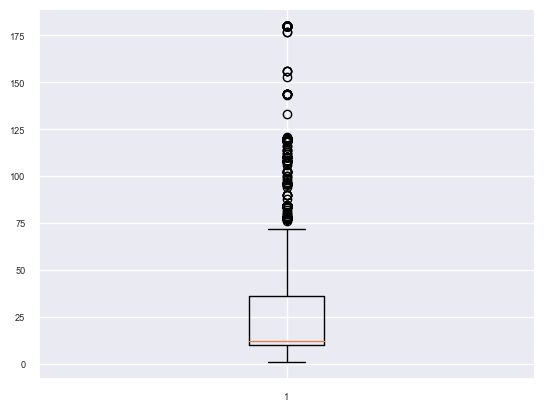

Boxplot for GAPR


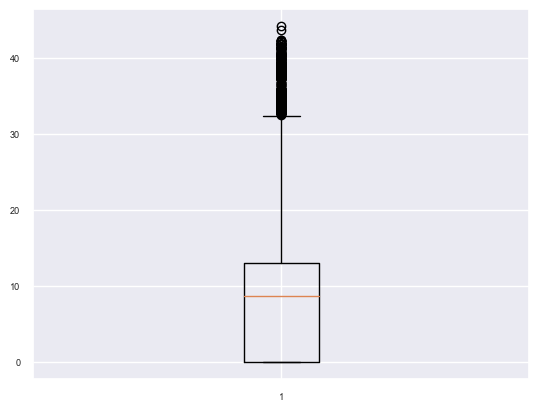

Boxplot for NIR


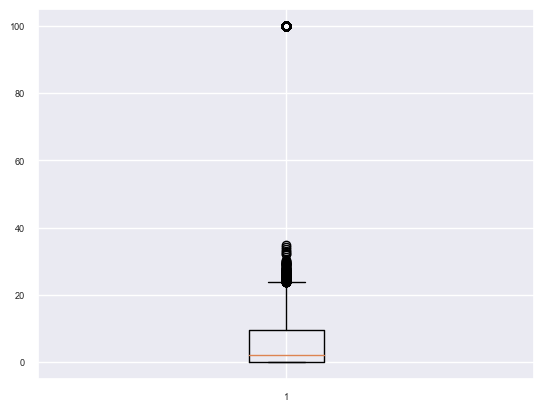

Boxplot for AGE


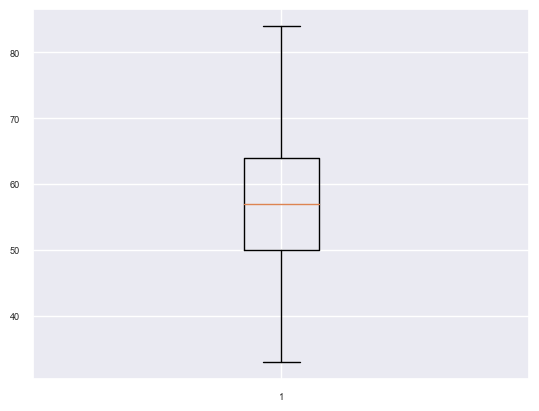

Boxplot for ANNUAL_INCOME


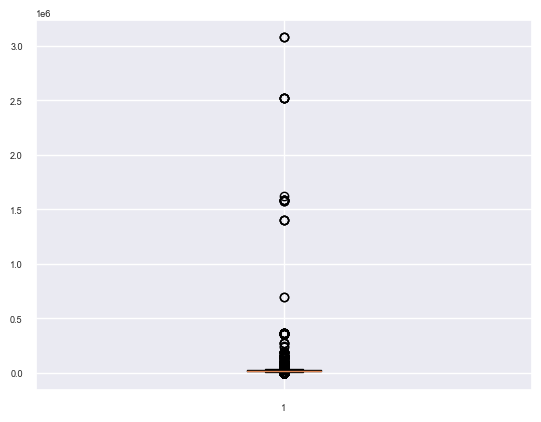

Boxplot for NUMBER_OF_MONTHS


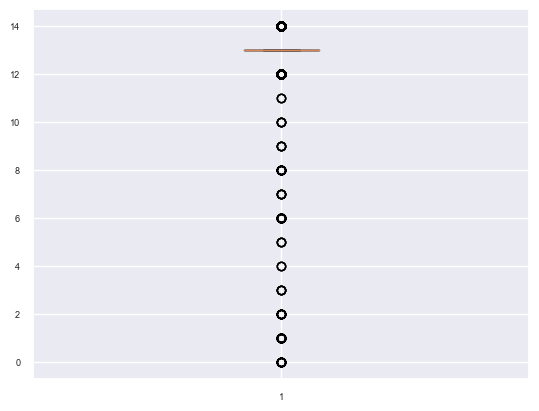

In [17]:
for i in total_data.columns:
    if (((total_data[i].dtype)=='float64') | ((total_data[i].dtype)=='int64')):
        print("Boxplot for " + i)
        plt.boxplot(total_data[i])
        plt.show()

In [18]:
def cap_data(FS_df):
    for col in FS_df.columns:
        if (((FS_df[col].dtype)=='float64') | ((FS_df[col].dtype)=='int64')):
            print("capping the ",col)
            percentiles = FS_df[col].quantile([0.25,0.75]).values
            FS_df[col][FS_df[col] <= percentiles[0]] = percentiles[0]
            FS_df[col][FS_df[col] >= percentiles[1]] = percentiles[1]
        else:
            FS_df[col]=FS_df[col]
    return FS_df

In [19]:
total_data = cap_data(total_data)

capping the  CUSTOMER_ID
capping the  GOOD_VALUE
capping the  ADVANCE_VALUE
capping the  LOAN_VALUE
capping the  INSTALLMENT_VALUE
capping the  NUMBER_INSTALLMENT
capping the  GAPR
capping the  NIR
capping the  AGE
capping the  ANNUAL_INCOME
capping the  NUMBER_OF_MONTHS


C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FS_df[col][FS_df[col] <= percentiles[0]] = percentiles[0]
C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FS_df[col][FS_df[col] >= percentiles[1]] = percentiles[1]
C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

Boxplot for CUSTOMER_ID


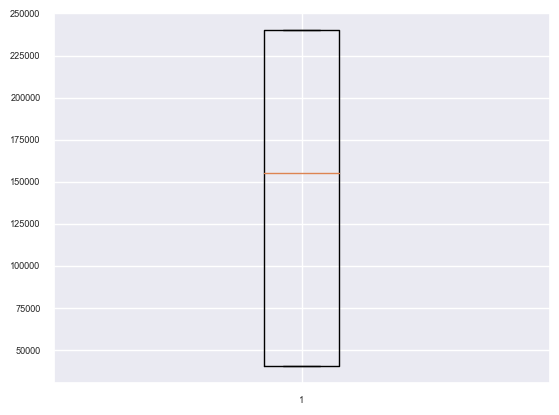

Boxplot for GOOD_VALUE


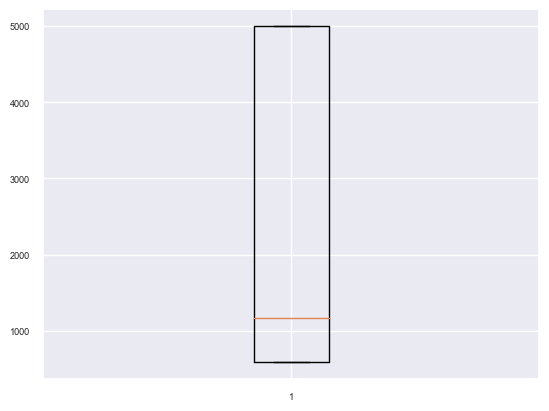

Boxplot for ADVANCE_VALUE


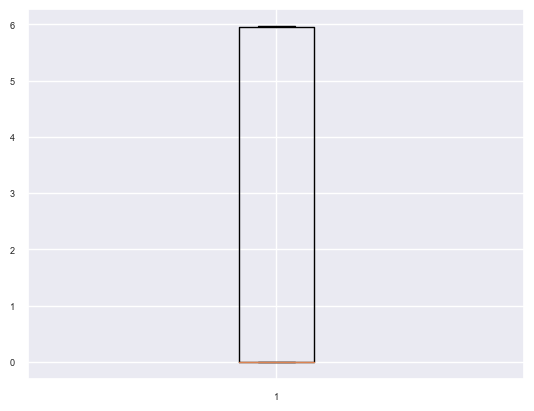

Boxplot for LOAN_VALUE


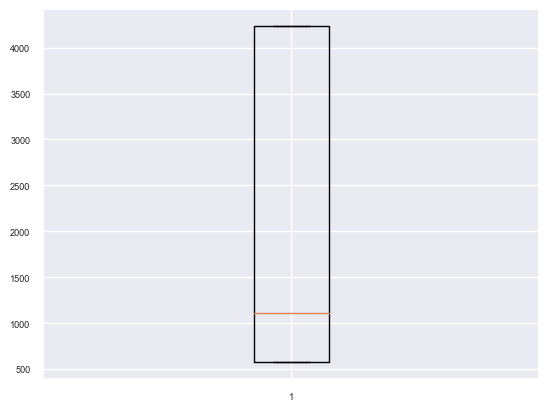

Boxplot for INSTALLMENT_VALUE


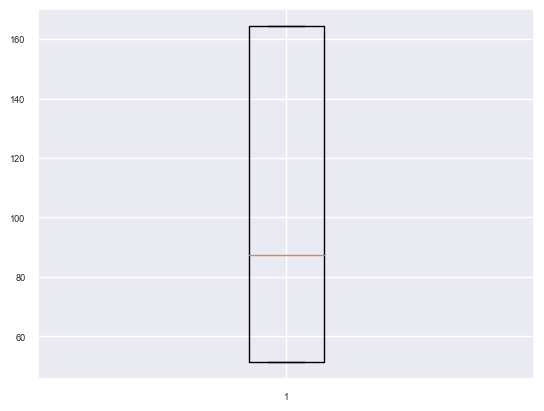

Boxplot for NUMBER_INSTALLMENT


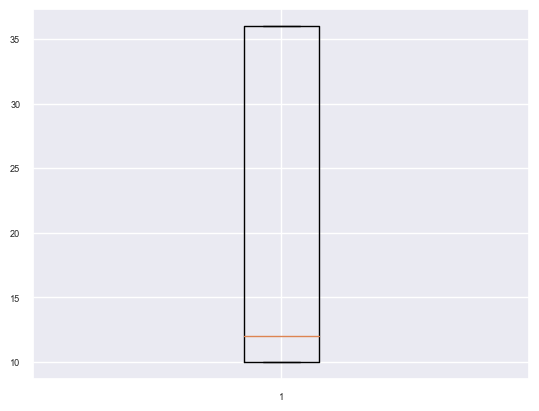

Boxplot for GAPR


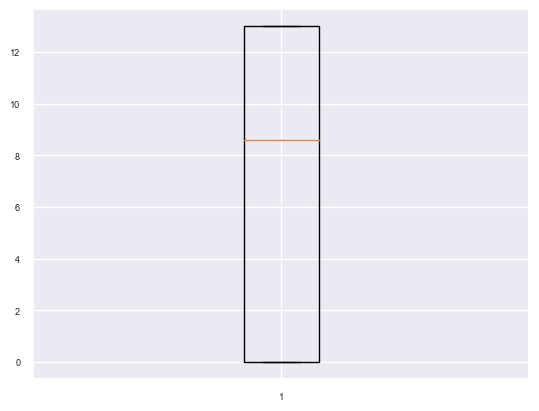

Boxplot for NIR


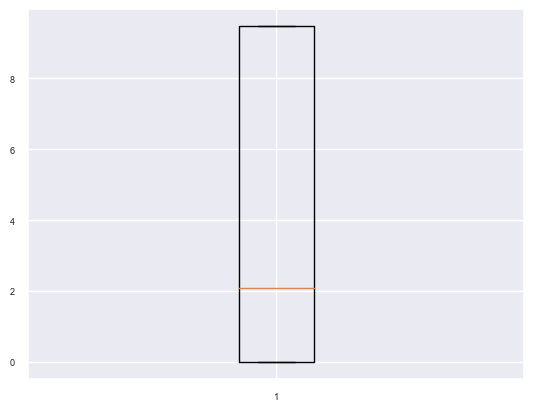

Boxplot for AGE


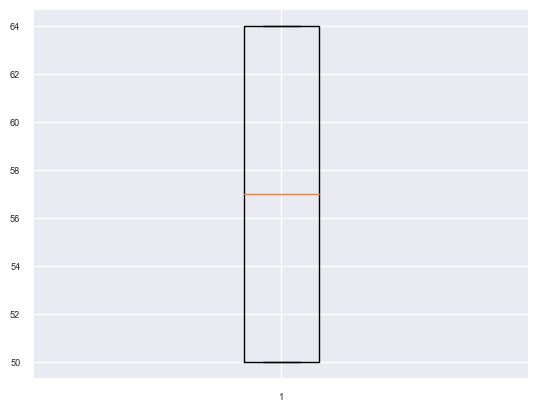

Boxplot for ANNUAL_INCOME


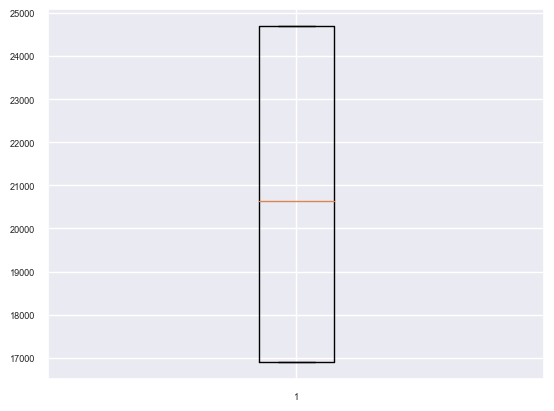

Boxplot for NUMBER_OF_MONTHS


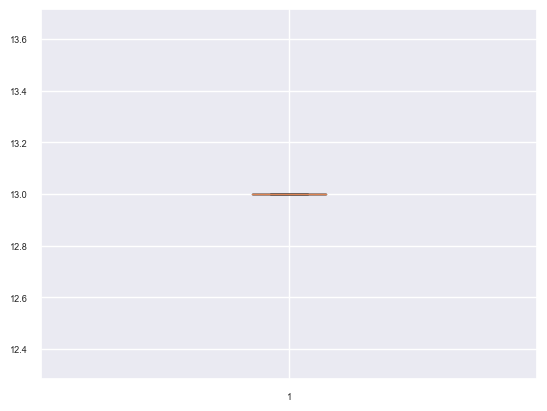

In [20]:
for i in total_data.columns:
    if (((total_data[i].dtype)=='float64') | ((total_data[i].dtype)=='int64')):
        print("Boxplot for " + i)
        plt.boxplot(total_data[i])
        plt.show()

### Target Variable Exploratory Analysis

In [21]:
#target class distribution
total_data['STATUS'].value_counts()

CONCLUDED REGULARLY    30037
EARLY EXPIRED           7254
Name: STATUS, dtype: int64

<AxesSubplot: xlabel='STATUS', ylabel='count'>

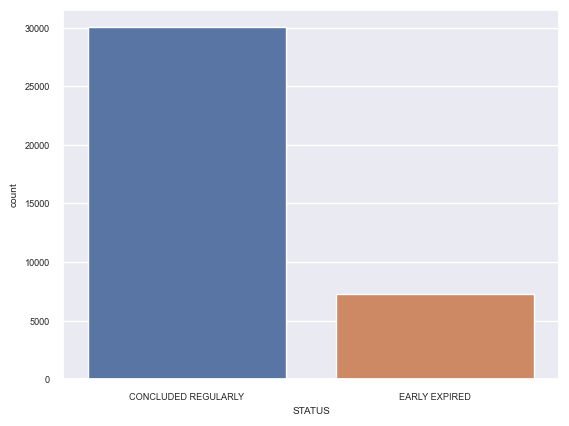

In [22]:
sns.countplot(data = total_data, x = 'STATUS' )

### Train-Test Split

In [23]:
x = total_data.drop("STATUS", axis = 1)
y = total_data["STATUS"]

In [24]:
# label_encoder to encode the categorical label into numerical figures
label_encoder = LabelEncoder()
  
# Encode labels in column 'status'.
y= label_encoder.fit_transform(y)

In [25]:
#split data into a 70:30 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=30, stratify = y)

## III. Feature Engineering

**a) Scaling numerical data**<br>

**b) Encoding categorical data**<br>

**c) Dealing with Unbalanced Dataset**<br>


### Encoding categorical variables

In [26]:
#check the data types of the columns in the training dataset
x_train.dtypes

CUSTOMER_ID             int64
SECTOR_TYPE            object
GOOD_VALUE            float64
ADVANCE_VALUE         float64
LOAN_VALUE            float64
INSTALLMENT_VALUE     float64
NUMBER_INSTALLMENT      int64
GAPR                  float64
NIR                   float64
REFINANCED             object
FROM_REFINANCE         object
SEX                    object
AGE                     int64
ANNUAL_INCOME         float64
NUMBER_OF_MONTHS        int64
MARITAL_STATUS         object
LEASE                  object
dtype: object

In [27]:
#encode 
x_train = pd.get_dummies(x_train[['SECTOR_TYPE','REFINANCED', 'FROM_REFINANCE','SEX',
                                                'MARITAL_STATUS','LEASE']])


### Feature selection

In [28]:

#Suppose, we select   features with all anova scores
selector = SelectKBest(score_func=f_classif, k=20)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
x_new = selector.fit(x_train, y_train)
names = x_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)


          Feat_names      F_Scores
4       REFINANCED_Y  27638.949219
3       REFINANCED_N  27638.871094
2     SECTOR_TYPE_PL  17780.878906
1     SECTOR_TYPE_FL  14186.689453
5   FROM_REFINANCE_N   7120.982910
6   FROM_REFINANCE_Y   7120.979004
0     SECTOR_TYPE_CL     93.343246
13  MARITAL_STATUS_W     75.055351
11  MARITAL_STATUS_J     68.616287
16           LEASE_P     68.154198
15           LEASE_A     42.444130
10  MARITAL_STATUS_D     37.583687
17           LEASE_R     23.935904
8              SEX_W      7.699080
7              SEX_M      7.693211
12  MARITAL_STATUS_S      6.103556
9   MARITAL_STATUS_C      1.783235
14  MARITAL_STATUS_X      1.354809
18           LEASE_T      0.634704
19           LEASE_X      0.441736


<AxesSubplot: xlabel='F_Scores', ylabel='Feat_names'>

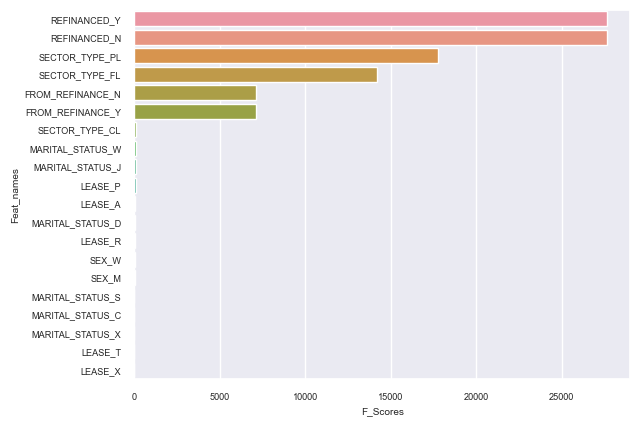

In [29]:
sns.barplot(data = ns_df_sorted.nlargest(20, 'F_Scores'), y= 'Feat_names', x = 'F_Scores' )

In [30]:
x_train = x_train.loc[:, x_train.columns.isin(ns_df_sorted.Feat_names)]
x_train.head()

,SECTOR_TYPE_CL,SECTOR_TYPE_FL,SECTOR_TYPE_PL,REFINANCED_N,REFINANCED_Y,FROM_REFINANCE_N,FROM_REFINANCE_Y,SEX_M,SEX_W,MARITAL_STATUS_C,MARITAL_STATUS_D,MARITAL_STATUS_J,MARITAL_STATUS_S,MARITAL_STATUS_W,MARITAL_STATUS_X,LEASE_A,LEASE_P,LEASE_R,LEASE_T,LEASE_X
9472,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
20393,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0
30443,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
20547,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
33195,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0


### Normalizing numerical variables

In [31]:
scaler = MinMaxScaler(feature_range = (0,1))
names = x_train.columns
d = scaler.fit_transform(x_train)
x_train = pd.DataFrame(d, columns = names)
x_train.head()

,SECTOR_TYPE_CL,SECTOR_TYPE_FL,SECTOR_TYPE_PL,REFINANCED_N,REFINANCED_Y,FROM_REFINANCE_N,FROM_REFINANCE_Y,SEX_M,SEX_W,MARITAL_STATUS_C,MARITAL_STATUS_D,MARITAL_STATUS_J,MARITAL_STATUS_S,MARITAL_STATUS_W,MARITAL_STATUS_X,LEASE_A,LEASE_P,LEASE_R,LEASE_T,LEASE_X
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### SMOTE Oversampling to correct Data Imbalance

In [32]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train== 0)))

Before OverSampling, counts of label '1': 5078
Before OverSampling, counts of label '0': 21025


In [33]:
# Resampling the minority class
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
x_train, y_train = sm.fit_resample(x_train, y_train)

In [34]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train== 0)))

After OverSampling, counts of label '1': 21025
After OverSampling, counts of label '0': 21025


### Cleaning Test Data

In [35]:
def clean_data(data):
    data['MARITAL_STATUS'] = data['MARITAL_STATUS'].fillna(marital_status_mode)
    data['LEASE'] = data['LEASE'].fillna(lease_mode)
    data = cap_data(data)
    data = pd.get_dummies(data[['SECTOR_TYPE','REFINANCED', 'FROM_REFINANCE','SEX',
                                                    'MARITAL_STATUS','LEASE']])
    data = data.loc[:, data.columns.isin(ns_df_sorted.Feat_names)]
    scaled = scaler.fit_transform(data)
    data = pd.DataFrame(scaled, columns = data.columns)
    return data

In [36]:
x_test = clean_data(x_test)

capping the  CUSTOMER_ID
capping the  GOOD_VALUE
capping the  ADVANCE_VALUE
capping the  LOAN_VALUE
capping the  INSTALLMENT_VALUE
capping the  NUMBER_INSTALLMENT
capping the  GAPR
capping the  NIR
capping the  AGE
capping the  ANNUAL_INCOME
capping the  NUMBER_OF_MONTHS


C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FS_df[col][FS_df[col] <= percentiles[0]] = percentiles[0]
C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FS_df[col][FS_df[col] >= percentiles[1]] = percentiles[1]
C:\Users\FaithIbigbemi\AppData\Local\Temp\ipykernel_12268\2526113706.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin


## IV. Modeling

**a) Modeling with Classifiers (try at least 3 different clf)**<br>
*hint: try with some of the following models `Linear Models`, `KNN`, `SVM`, `Decision Trees`, `Random Forest`, `XGBoost`*

**b) Tuning Parameter**<br>



### Random Forest Model

In [37]:
#build a random forest with default parameters
rand_default = RandomForestClassifier()
rand_default.fit(x_train, y_train)
rand_default_pred = rand_default.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rand_default_n_scores = cross_val_score(rand_default, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [38]:
rand_cm = metrics.confusion_matrix(y_test, rand_default_pred)
rand_cm

array([[8232,  780],
       [ 376, 1800]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test, rand_default_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.70      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



In [40]:
#set parameters for hyperparameter tuning
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [41]:
#perform gridsearchcv hyperparameter tuning
rand_grid_search = GridSearchCV(rand_default,
                           param_grid=param_grid)
rand_grid_search.fit(x_train, y_train)
print(rand_grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [42]:
#build a random forest with gridsearchcv parameters
rand_grid_search = rand_grid_search.best_estimator_
rand_grid_search.fit(x_train, y_train)
rand_grid_search_pred = rand_grid_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rand_grid_search_n_scores = cross_val_score(rand_grid_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [43]:
rand_grid_search_cm = metrics.confusion_matrix(y_test, rand_grid_search_pred)
rand_grid_search_cm

array([[8244,  768],
       [ 369, 1807]], dtype=int64)

In [44]:
print(metrics.classification_report(y_test, rand_grid_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      9012
           1       0.70      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



In [45]:
#perform randomsearchcv hyperparameter tuning
rand_random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
rand_random_search.fit(x_train, y_train)
print(rand_random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=150)


In [46]:
#build a random forest with randomsearchcv parameters
rand_random_search = rand_random_search.best_estimator_
rand_random_search.fit(x_train, y_train)
rand_random_search_pred = rand_random_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
rand_random_search_n_scores = cross_val_score(rand_random_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [47]:
rand_random_search_cm = metrics.confusion_matrix(y_test, rand_random_search_pred)
rand_random_search_cm

array([[8284,  728],
       [ 379, 1797]], dtype=int64)

In [48]:
print(metrics.classification_report(y_test, rand_random_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      9012
           1       0.71      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



### KNN Model

In [49]:
#build a random forest with default parameters
knn = KNeighborsClassifier()
knn_model= knn.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [50]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_n_scores = cross_val_score(knn, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=1, error_score=0)

In [51]:
#set parameters for the knn hyperparameter tuning
knn_params = {
    'n_neighbors': range(1,30,2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'leaf_size': range(1,50,5)
}

In [52]:
#gridsearchcv
knn_grid_search = GridSearchCV(estimator = knn,
                           param_grid=knn_params)
knn_grid_search.fit(x_train, y_train)
print(knn_grid_search.best_estimator_)

KNeighborsClassifier(leaf_size=1, metric='euclidean', n_neighbors=1)


In [53]:
#build a knn with gridsearchcv parameters
knn_grid_search = knn_grid_search.best_estimator_
knn_grid_search.fit(x_train, y_train)
knn_grid_search_pred = knn_grid_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_grid_search_n_scores = cross_val_score(knn_grid_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [54]:

knn_grid_search_cm = metrics.confusion_matrix(y_test, knn_grid_search_pred)
knn_grid_search_cm

array([[8091,  921],
       [ 435, 1741]], dtype=int64)

In [55]:
print(metrics.classification_report(y_test, knn_grid_search_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9012
           1       0.65      0.80      0.72      2176

    accuracy                           0.88     11188
   macro avg       0.80      0.85      0.82     11188
weighted avg       0.89      0.88      0.88     11188



In [57]:
#perform randomsearchcv hyperparameter tuning
knn_random_search = RandomizedSearchCV(knn,knn_params)
knn_random_search.fit(x_train, y_train)
print(knn_random_search.best_estimator_)

KNeighborsClassifier(leaf_size=11, metric='euclidean', n_neighbors=1,
                     weights='distance')


In [58]:
#build a knn with randomsearchcv parameters
knn_random_search = knn_random_search.best_estimator_
knn_random_search.fit(x_train, y_train)
knn_random_search_pred = knn_random_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
knn_random_search_n_scores = cross_val_score(knn_random_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [59]:
knn_random_search_cm = metrics.confusion_matrix(y_test, knn_random_search_pred)
knn_random_search_cm

array([[8091,  921],
       [ 435, 1741]], dtype=int64)

In [60]:
print(metrics.classification_report(y_test, knn_random_search_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      9012
           1       0.65      0.80      0.72      2176

    accuracy                           0.88     11188
   macro avg       0.80      0.85      0.82     11188
weighted avg       0.89      0.88      0.88     11188



### Decision Tree Model

In [61]:
tr = DecisionTreeClassifier()
tr_model= tr.fit(x_train, y_train)
tr_pred = tr_model.predict(x_test)

In [62]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tr_n_scores = cross_val_score(tr, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [63]:
#set parameters for the decision tree hyperparameter tuning
tr_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [64]:
#gridsearchcv
tr_grid_search = GridSearchCV(estimator = tr,
                           param_grid=tr_params)
tr_grid_search.fit(x_train, y_train)
print(tr_grid_search.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=5)


In [65]:
#build a tr with gridsearchcv parameters
tr_grid_search = tr_grid_search.best_estimator_
tr_grid_search.fit(x_train, y_train)
tr_grid_search_pred = tr_grid_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tr_grid_search_n_scores = cross_val_score(tr_grid_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [66]:

tr_grid_search_cm = metrics.confusion_matrix(y_test, tr_grid_search_pred)
tr_grid_search_cm

array([[8221,  791],
       [ 372, 1804]], dtype=int64)

In [67]:
print(metrics.classification_report(y_test, tr_grid_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.70      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



In [70]:
#perform randomsearchcv hyperparameter tuning
tr_random_search = RandomizedSearchCV( tr,tr_params)
tr_random_search.fit(x_train, y_train)
print(tr_random_search.best_estimator_)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=10)


In [72]:
#build a tree with randomsearchcv parameters
tr_random_search = tr_random_search.best_estimator_
tr_random_search.fit(x_train, y_train)
tr_random_search_pred = tr_random_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
tr_random_search_n_scores = cross_val_score(tr_random_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [73]:
tr_random_search_cm = metrics.confusion_matrix(y_test, tr_random_search_pred)
tr_random_search_cm

array([[8209,  803],
       [ 370, 1806]], dtype=int64)

In [74]:
print(metrics.classification_report(y_test, tr_random_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.69      0.83      0.75      2176

    accuracy                           0.90     11188
   macro avg       0.82      0.87      0.84     11188
weighted avg       0.91      0.90      0.90     11188



### Gradient Boosting

In [75]:
grd = GradientBoostingClassifier()
grd_model= grd.fit(x_train, y_train)
grd_pred = grd_model.predict(x_test)

In [76]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grd_n_scores = cross_val_score(grd, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [77]:
#set parameters for the gb hyperparameter tuning
grd_params = {'n_estimators':range(10,100,10)
}

In [78]:
#gridsearchcv
grd_grid_search = GridSearchCV(estimator = grd,
                           param_grid=grd_params)
grd_grid_search.fit(x_train, y_train)
print(grd_grid_search.best_estimator_)

GradientBoostingClassifier(n_estimators=90)


In [79]:
#build a tr with gridsearchcv parameters
grd_grid_search = grd_grid_search.best_estimator_
grd_grid_search.fit(x_train, y_train)
grd_grid_search_pred = grd_grid_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grd_grid_search_n_scores = cross_val_score(grd_grid_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [80]:
grd_grid_search_cm = metrics.confusion_matrix(y_test, grd_grid_search_pred)
grd_grid_search_cm

array([[8229,  783],
       [ 366, 1810]], dtype=int64)

In [81]:
print(metrics.classification_report(y_test, grd_grid_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.70      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



In [82]:
#perform randomsearchcv hyperparameter tuning
grd_random_search = RandomizedSearchCV( grd,grd_params)
grd_random_search.fit(x_train, y_train)
print(grd_random_search.best_estimator_)

C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


GradientBoostingClassifier(n_estimators=90)


In [83]:
#build a grd with randomsearchcv parameters
grd_random_search = grd_random_search.best_estimator_
grd_random_search.fit(x_train, y_train)
grd_random_search_pred = grd_random_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grd_random_search_n_scores = cross_val_score(grd_random_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [84]:
grd_random_search_cm = metrics.confusion_matrix(y_test, grd_random_search_pred)
grd_random_search_cm

array([[8229,  783],
       [ 366, 1810]], dtype=int64)

In [85]:
print(metrics.classification_report(y_test, grd_random_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.70      0.83      0.76      2176

    accuracy                           0.90     11188
   macro avg       0.83      0.87      0.85     11188
weighted avg       0.91      0.90      0.90     11188



### SVM

In [86]:
sv = LinearSVC()
sv_model= sv.fit(x_train, y_train)
sv_pred = sv_model.predict(x_test)

In [87]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
sv_n_scores = cross_val_score(sv, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [92]:
#set parameters for the knn hyperparameter tuning
sv_params = {'C': [0.1, 1, 10, 100, 1000]
}

In [93]:
#gridsearchcv
sv_grid_search = GridSearchCV(estimator = sv,
                           param_grid=sv_params)
sv_grid_search.fit(x_train, y_train)
print(sv_grid_search.best_estimator_)

C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\F

LinearSVC(C=1)


In [94]:
#build a sv with gridsearchcv parameters
sv_grid_search = sv_grid_search.best_estimator_
sv_grid_search.fit(x_train, y_train)
sv_grid_search_pred = sv_grid_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
sv_grid_search_n_scores = cross_val_score(sv_grid_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [95]:
sv_grid_search_cm = metrics.confusion_matrix(y_test, sv_grid_search_pred)
sv_grid_search_cm

array([[8194,  818],
       [ 359, 1817]], dtype=int64)

In [96]:
print(metrics.classification_report(y_test, sv_grid_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.69      0.84      0.76      2176

    accuracy                           0.89     11188
   macro avg       0.82      0.87      0.84     11188
weighted avg       0.91      0.89      0.90     11188



In [98]:
#perform randomsearchcv hyperparameter tuning
sv_random_search = RandomizedSearchCV(sv,sv_params)
sv_random_search.fit(x_train, y_train)
print(sv_random_search.best_estimator_)

C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\FaithIbigbemi\anaconda3\envs\faithvirtual\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converg

LinearSVC(C=1)


In [99]:
#build a knn with randomsearchcv parameters
sv_random_search = sv_random_search.best_estimator_
sv_random_search.fit(x_train, y_train)
sv_random_search_pred = sv_random_search.predict(x_test)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
sv_random_search_n_scores = cross_val_score(sv_random_search, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

In [100]:
sv_random_search_cm = metrics.confusion_matrix(y_test, sv_random_search_pred)
sv_random_search_cm

array([[8194,  818],
       [ 359, 1817]], dtype=int64)

In [101]:
print(metrics.classification_report(y_test, sv_random_search_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      9012
           1       0.69      0.84      0.76      2176

    accuracy                           0.89     11188
   macro avg       0.82      0.87      0.84     11188
weighted avg       0.91      0.89      0.90     11188




## V. Evaluation

**a) Evaluating with Confusion Matrix**<br>

**a) Evaluating with other Metrics**<br>



In [102]:
def conf_matrix(cm,model):
    # evaluate the model
    ax = sns.heatmap(cm/np.sum(cm), annot=True,
                fmt='.2%', cmap='Blues')       
    ax.set_title(f"Confusion Matrix of {model}");
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');



    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])



    ## Display the visualization of the Confusion Matrix.
    print(cm)
    plt.show()


In [103]:
def create_roc_curve(test, pred):
    # calculate roc curve
    fpr, tpr, thresholds = metrics.roc_curve(test, pred)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False positive rate')
    plt.ylabel('Sensitivity/ Recall')
    # show the plot
    return plt.show()

In [104]:
list_of_metrics = []

def model_metric(test, pred, score, model, param):
    auc = metrics.roc_auc_score(test, pred)
    accuracy = np.mean(score)
    precision = metrics.precision_score(test,pred)
    recall = metrics.recall_score(test, pred)
    f1_score = metrics.f1_score(test, pred)
    
    s = pd.Series({'Model': model,
                'Parameter': param,
                'Accuracy': accuracy, 
               'Precision': precision, 
               'Recall/Sensitivity': recall,
               'F1 Score': f1_score,
               'AUC' :auc})
    list_of_metrics.append(s)
    return s

### Random Forest Evaluation

[[8232  780]
 [ 376 1800]]


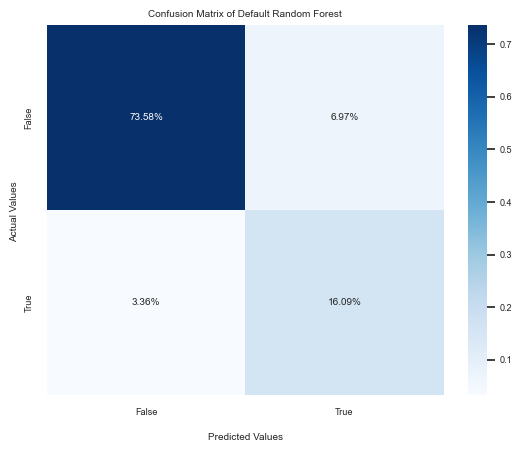

In [107]:
#Default Random forest confusion matrix
conf_matrix(rand_cm,'Default Random Forest')

In [108]:
#Random forest metrics
model_metric(y_test, rand_default_pred, rand_default_n_scores, 'Random Forest', 'Default')

Model                 Random Forest
Parameter                   Default
Accuracy                    0.88432
Precision                  0.697674
Recall/Sensitivity         0.827206
F1 Score                   0.756939
AUC                        0.870327
dtype: object

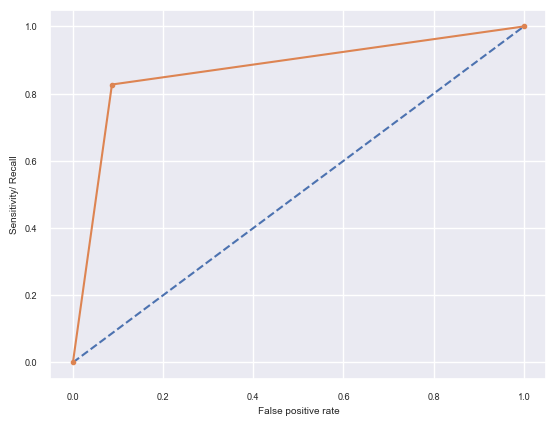

In [109]:
#Default Random forest roc curve
create_roc_curve(y_test, rand_default_pred)

[[8244  768]
 [ 369 1807]]


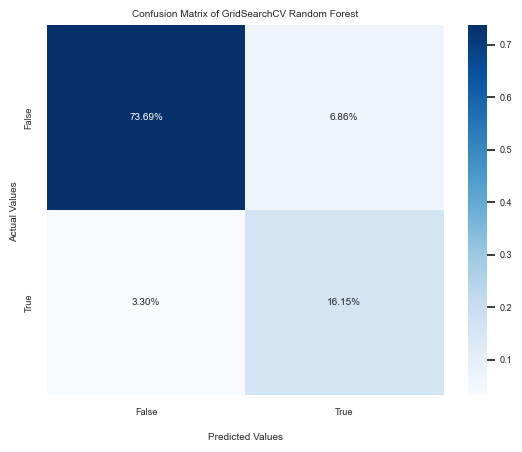

In [110]:
# GridSearchCV Random forest confusion matrix
conf_matrix(rand_grid_search_cm,'GridSearchCV Random Forest')

In [111]:
# GridSearchCV Random forest metrics
model_metric(y_test, rand_grid_search_pred, rand_grid_search_n_scores, 'Random Forest', 'GridSearchCv')

Model                 Random Forest
Parameter              GridSearchCv
Accuracy                   0.880666
Precision                  0.701748
Recall/Sensitivity         0.830423
F1 Score                   0.760682
AUC                        0.872602
dtype: object

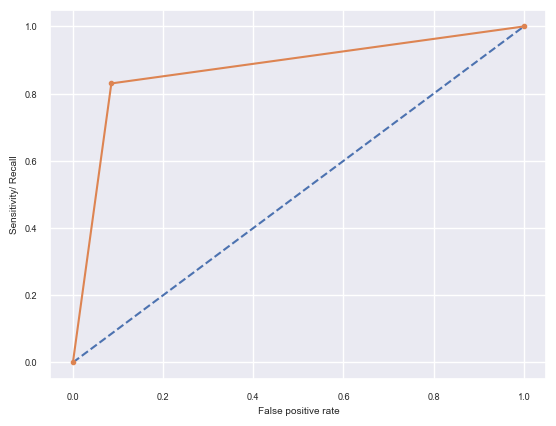

In [112]:
# GridSearchCV Random forest roc curve
create_roc_curve(y_test, rand_grid_search_pred)

[[8284  728]
 [ 379 1797]]


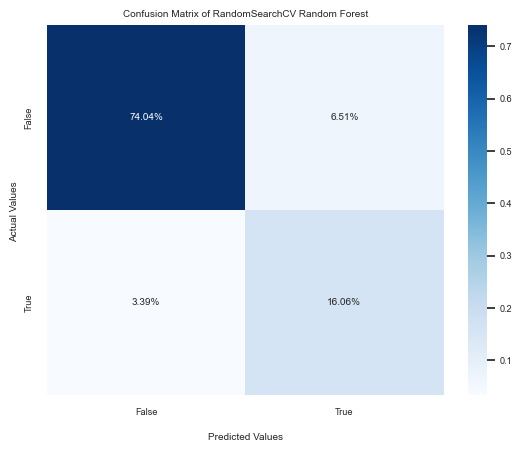

In [113]:
# RandomSearchCV Random forest confusion matrix
conf_matrix(rand_random_search_cm,'RandomSearchCV Random Forest')

In [114]:
# RandomSearchCV Random forest metrics
model_metric(y_test, rand_random_search_pred, rand_random_search_n_scores, 'Random Forest', 'RandomSearchCv')

Model                  Random Forest
Parameter             RandomSearchCv
Accuracy                    0.880087
Precision                   0.711683
Recall/Sensitivity          0.825827
F1 Score                    0.764518
AUC                         0.872523
dtype: object

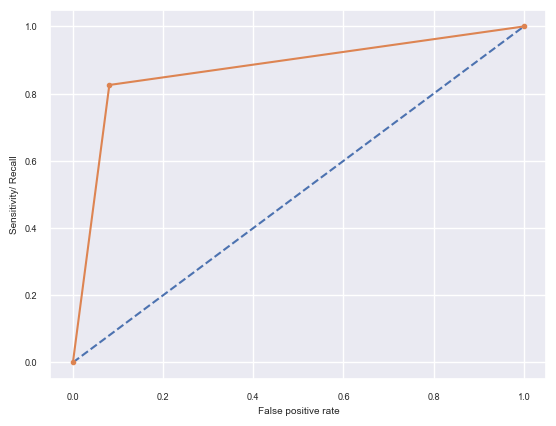

In [115]:
# GridSearchCV Random forest roc curve
create_roc_curve(y_test, rand_random_search_pred)

### KNN Evaluation

[[8858  154]
 [ 711 1465]]


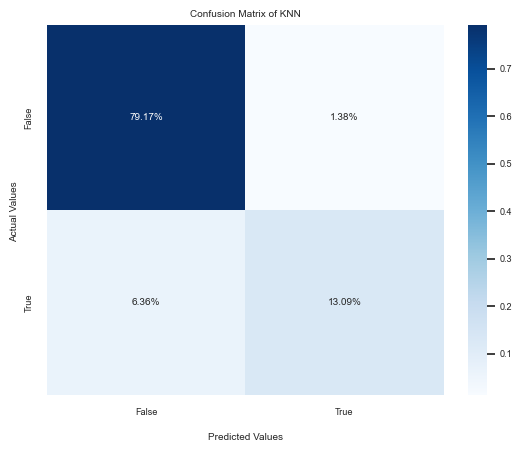

In [116]:
#Default knn confusion matrix
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
conf_matrix(knn_cm ,'KNN')

In [118]:
#knn metrics
model_metric(y_test, knn_pred, knn_n_scores, 'KNN', 'Default')

Model                      KNN
Parameter              Default
Accuracy              0.828847
Precision              0.90488
Recall/Sensitivity    0.673254
F1 Score              0.772069
AUC                   0.828083
dtype: object

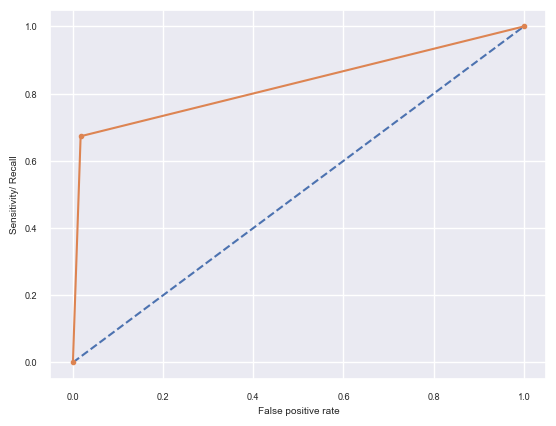

In [119]:
#Default knn roc curve
create_roc_curve(y_test, knn_pred)

[[8091  921]
 [ 435 1741]]


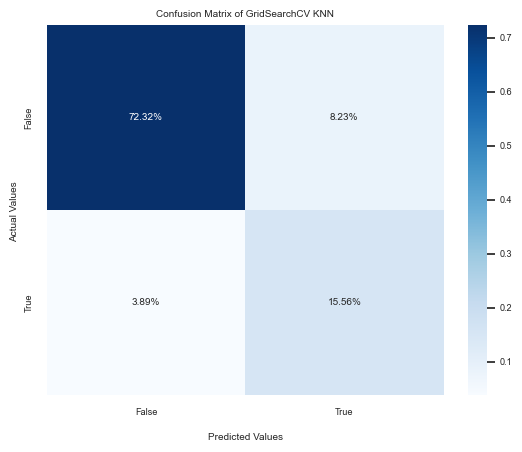

In [120]:
# GridSearchCV knn confusion matrix
conf_matrix(knn_grid_search_cm,'GridSearchCV KNN')

In [121]:
# GridSearchCV knn metrics
model_metric(y_test, knn_grid_search_pred, knn_grid_search_n_scores, 'KNN', 'GridSearchCv')

Model                          KNN
Parameter             GridSearchCv
Accuracy                  0.849409
Precision                  0.65402
Recall/Sensitivity        0.800092
F1 Score                  0.719719
AUC                       0.848947
dtype: object

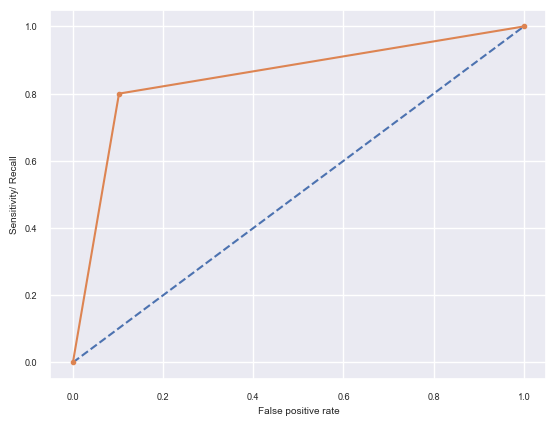

In [122]:
# GridSearchCV knn roc curve
create_roc_curve(y_test, knn_grid_search_pred)

[[8091  921]
 [ 435 1741]]


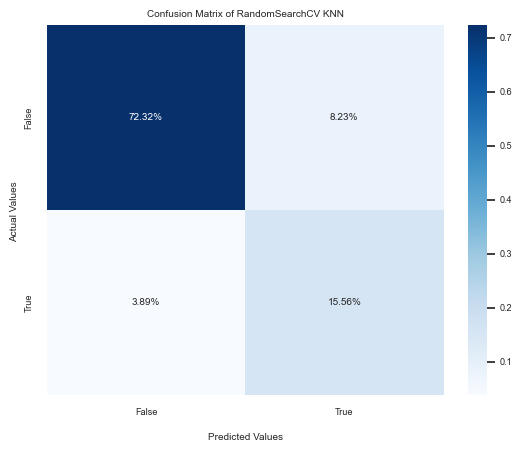

In [123]:
# RandomSearchCV knn confusion matrix
conf_matrix(knn_random_search_cm,'RandomSearchCV KNN')

In [124]:
# RandomSearchCV knn metrics
model_metric(y_test, knn_random_search_pred, knn_random_search_n_scores, 'KNN', 'RandomSearchCv')

Model                            KNN
Parameter             RandomSearchCv
Accuracy                    0.849409
Precision                    0.65402
Recall/Sensitivity          0.800092
F1 Score                    0.719719
AUC                         0.848947
dtype: object

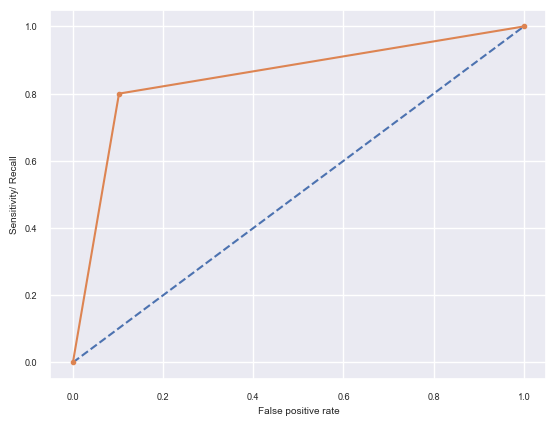

In [125]:
# GridSearchCV Random forest roc curve
create_roc_curve(y_test, knn_random_search_pred)

### Decision Tree Evaluation

[[8235  777]
 [ 380 1796]]


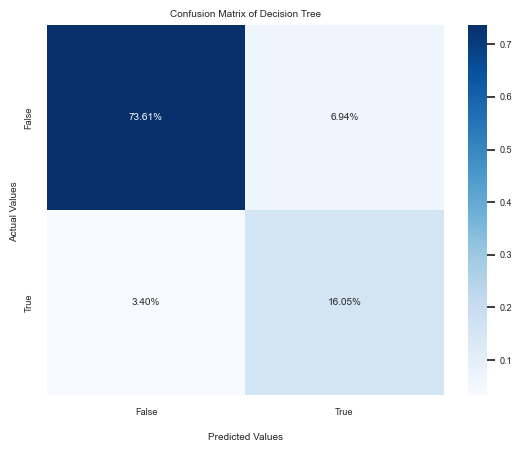

In [126]:
#Default tree confusion matrix
tr_cm = metrics.confusion_matrix(y_test, tr_pred)
conf_matrix(tr_cm ,'Decision Tree')

In [128]:
#tree metrics
model_metric(y_test, tr_pred, tr_n_scores, 'Decision Tree', 'Default')

Model                 Decision Tree
Parameter                   Default
Accuracy                   0.884463
Precision                  0.698018
Recall/Sensitivity         0.825368
F1 Score                    0.75637
AUC                        0.869575
dtype: object

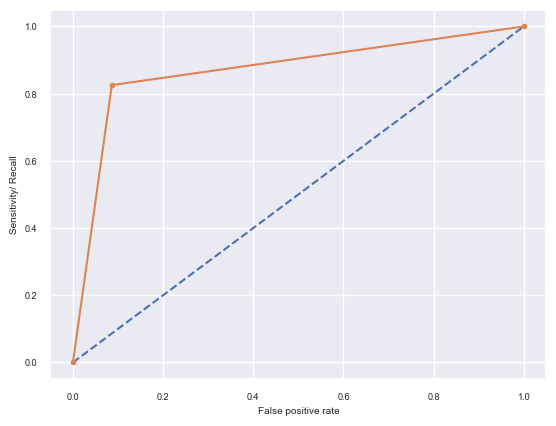

In [129]:
#Default tree roc curve
create_roc_curve(y_test, tr_pred)

[[8221  791]
 [ 372 1804]]


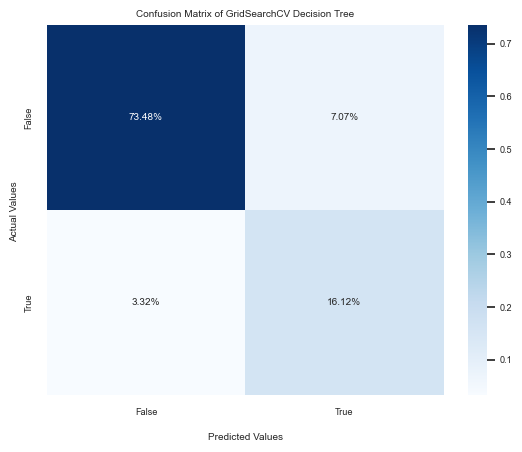

In [130]:
# GridSearchCV tr confusion matrix
conf_matrix(tr_grid_search_cm,'GridSearchCV Decision Tree')

In [131]:
# GridSearchCV tr metrics
model_metric(y_test, tr_grid_search_pred, tr_grid_search_n_scores, 'Decision Tree', 'GridSearchCv')

Model                 Decision Tree
Parameter              GridSearchCv
Accuracy                   0.884114
Precision                  0.695183
Recall/Sensitivity         0.829044
F1 Score                   0.756236
AUC                        0.870636
dtype: object

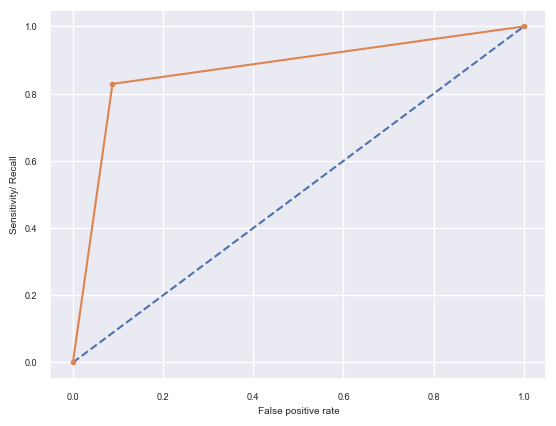

In [132]:
# GridSearchCV tr roc curve
create_roc_curve(y_test, tr_grid_search_pred)

[[8209  803]
 [ 370 1806]]


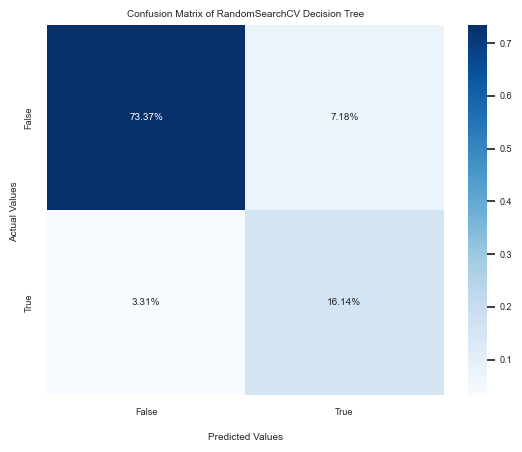

In [133]:
# RandomSearchCV tr confusion matrix
conf_matrix(tr_random_search_cm,'RandomSearchCV Decision Tree')

In [134]:
# RandomSearchCV tr metrics
model_metric(y_test, tr_random_search_pred, tr_random_search_n_scores, 'Decision Tree', 'RandomSearchCv')

Model                  Decision Tree
Parameter             RandomSearchCv
Accuracy                    0.883147
Precision                   0.692219
Recall/Sensitivity          0.829963
F1 Score                    0.754859
AUC                          0.87043
dtype: object

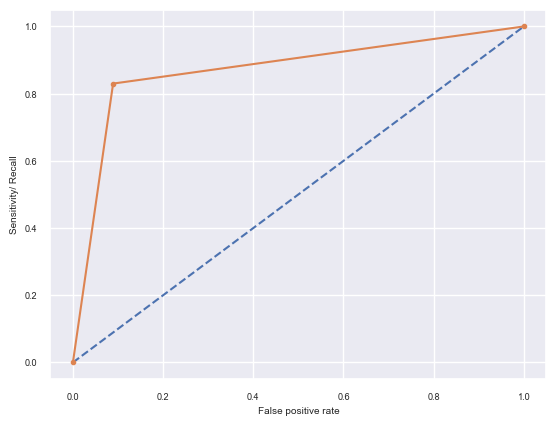

In [135]:
# GridSearchCV tr roc curve
create_roc_curve(y_test, tr_random_search_pred)

### Gradient Boosting Evaluation

[[8229  783]
 [ 366 1810]]


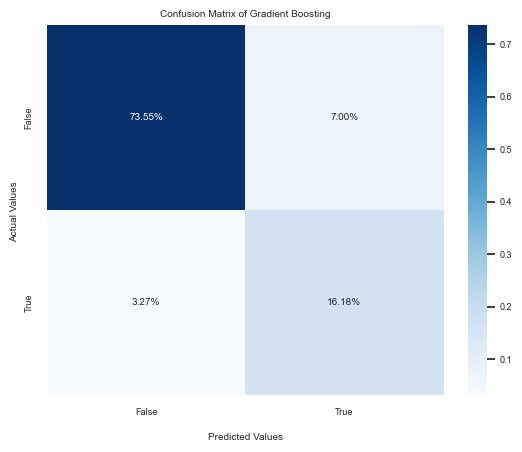

In [136]:
grd_cm = metrics.confusion_matrix(y_test, grd_pred)
conf_matrix(grd_cm ,'Gradient Boosting')

In [138]:
model_metric(y_test, grd_pred, grd_n_scores, 'Gradient Boost', 'Default')

Model                 Gradient Boost
Parameter                    Default
Accuracy                    0.883528
Precision                   0.698033
Recall/Sensitivity          0.831801
F1 Score                    0.759069
AUC                         0.872459
dtype: object

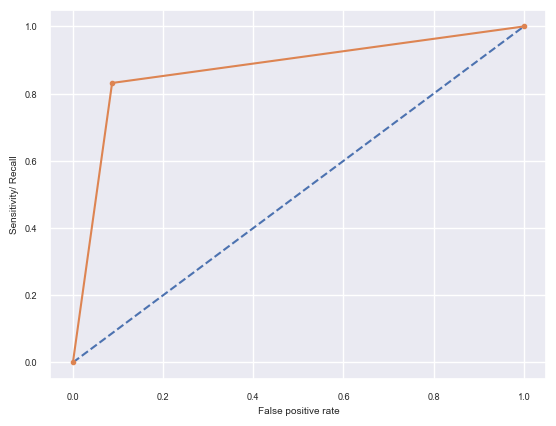

In [139]:
create_roc_curve(y_test, grd_pred)

[[8229  783]
 [ 366 1810]]


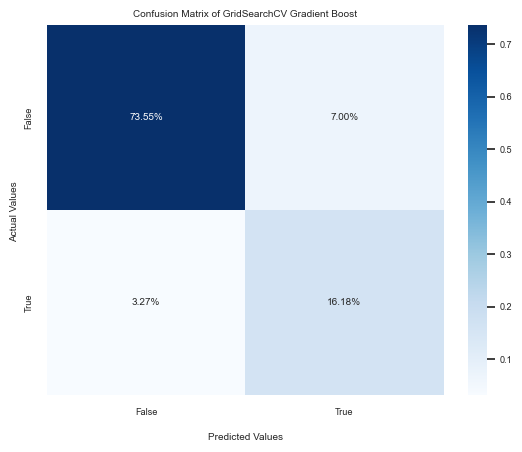

In [140]:
# GridSearchCV grd confusion matrix
conf_matrix(grd_grid_search_cm,'GridSearchCV Gradient Boost')

In [141]:
# GridSearchCV grd metrics
model_metric(y_test, grd_grid_search_pred, grd_grid_search_n_scores, 'Gradient Boost', 'GridSearchCv')

Model                 Gradient Boost
Parameter               GridSearchCv
Accuracy                    0.883115
Precision                   0.698033
Recall/Sensitivity          0.831801
F1 Score                    0.759069
AUC                         0.872459
dtype: object

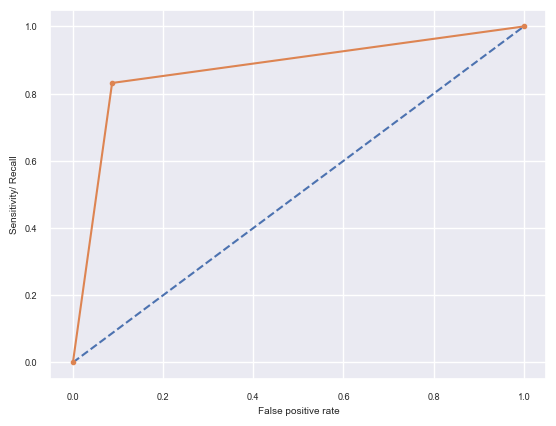

In [142]:
# GridSearchCV grd roc curve
create_roc_curve(y_test, grd_grid_search_pred)

[[8229  783]
 [ 366 1810]]


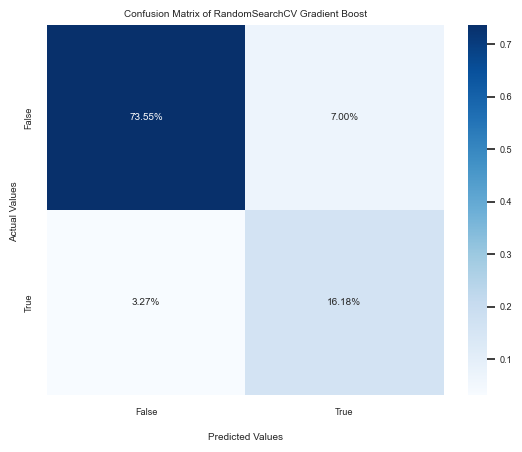

In [143]:
# RandomSearchCV grd confusion matrix
conf_matrix(grd_random_search_cm,'RandomSearchCV Gradient Boost')

In [144]:
# RandomSearchCV grd metrics
model_metric(y_test, grd_random_search_pred, grd_random_search_n_scores, 'Gradient Boost', 'RandomSearchCv')

Model                 Gradient Boost
Parameter             RandomSearchCv
Accuracy                    0.883115
Precision                   0.698033
Recall/Sensitivity          0.831801
F1 Score                    0.759069
AUC                         0.872459
dtype: object

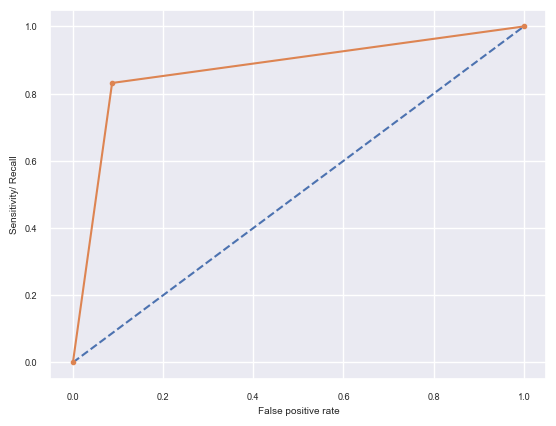

In [145]:
# GridSearchCV grd roc curve
create_roc_curve(y_test, grd_random_search_pred)

### SVM Evaluation

[[8194  818]
 [ 359 1817]]


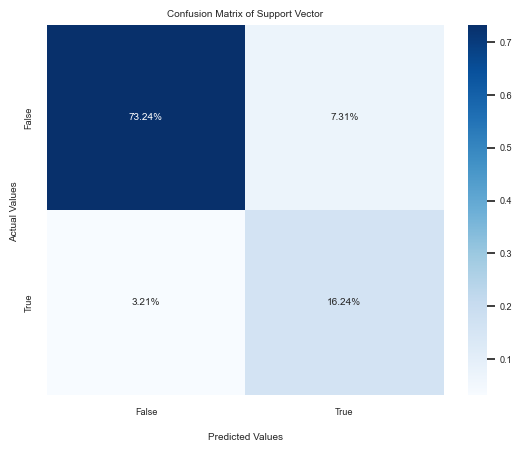

In [146]:
sv_cm = metrics.confusion_matrix(y_test, sv_pred)
conf_matrix(sv_cm ,'Support Vector')

In [148]:
model_metric(y_test, sv_pred, sv_n_scores, 'Support Vector Machine', 'Default')

Model                 Support Vector Machine
Parameter                            Default
Accuracy                            0.879255
Precision                           0.689564
Recall/Sensitivity                  0.835018
F1 Score                            0.755352
AUC                                 0.872125
dtype: object

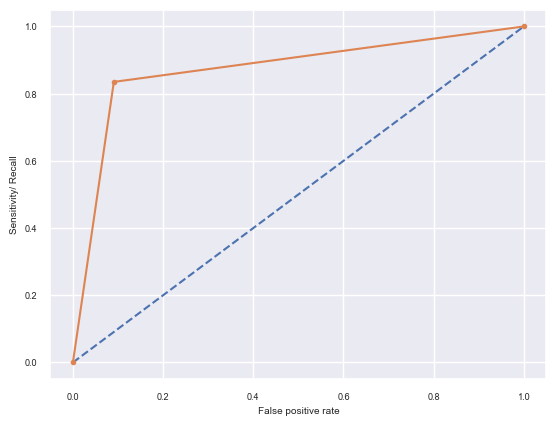

In [149]:
create_roc_curve(y_test, sv_pred)

[[8194  818]
 [ 359 1817]]


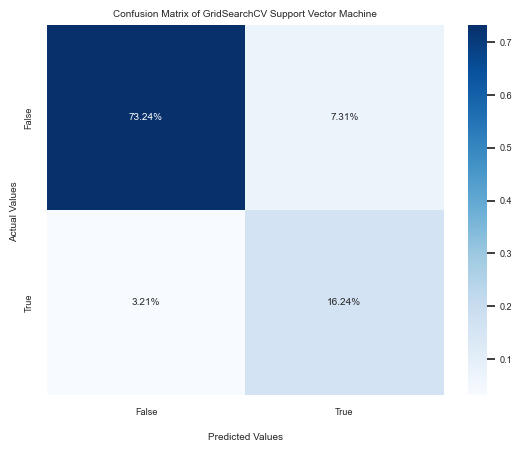

In [150]:
# GridSearchCV sv confusion matrix
conf_matrix(sv_grid_search_cm,'GridSearchCV Support Vector Machine')

In [151]:
# GridSearchCV sv metrics
model_metric(y_test, sv_grid_search_pred, sv_grid_search_n_scores, 'Support Vector Machine', 'GridSearchCv')

Model                 Support Vector Machine
Parameter                       GridSearchCv
Accuracy                            0.879255
Precision                           0.689564
Recall/Sensitivity                  0.835018
F1 Score                            0.755352
AUC                                 0.872125
dtype: object

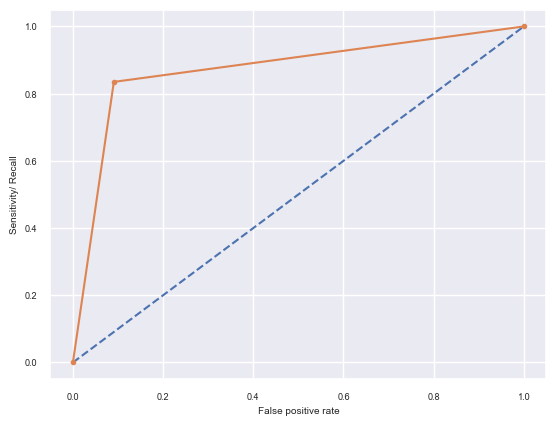

In [152]:
# GridSearchCV sv roc curve
create_roc_curve(y_test, sv_grid_search_pred)

[[8194  818]
 [ 359 1817]]


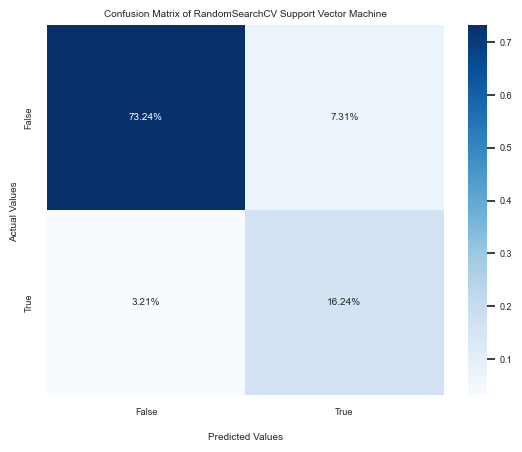

In [153]:
# RandomSearchCV sv confusion matrix
conf_matrix(sv_random_search_cm,'RandomSearchCV Support Vector Machine')

In [154]:
# RandomSearchCV sv metrics
model_metric(y_test, sv_random_search_pred, sv_random_search_n_scores, 'Support Vector Machine', 'RandomSearchCv')

Model                 Support Vector Machine
Parameter                     RandomSearchCv
Accuracy                            0.879255
Precision                           0.689564
Recall/Sensitivity                  0.835018
F1 Score                            0.755352
AUC                                 0.872125
dtype: object

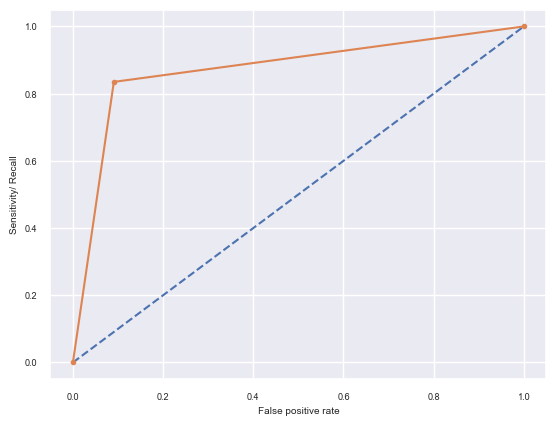

In [155]:
# GridSearchCV sv roc curve
create_roc_curve(y_test, sv_random_search_pred)

## VI. Export Results

**a) Export Model Results (Paramters and Performances)**<br>
*hint: create a dataframe with all the perfomances and export it to a file*


In [160]:
metric_df = pd.DataFrame(list_of_metrics)

In [161]:
metric_df

,Model,Parameter,Accuracy,Precision,Recall/Sensitivity,F1 Score,AUC
0,Random Forest,Default,0.884320,0.697674,0.827206,0.756939,0.870327
1,Random Forest,GridSearchCv,0.880666,0.701748,0.830423,0.760682,0.872602
2,Random Forest,RandomSearchCv,0.880087,0.711683,0.825827,0.764518,0.872523
3,KNN,Default,0.828847,0.904880,0.673254,0.772069,0.828083
4,KNN,GridSearchCv,0.849409,0.654020,0.800092,0.719719,0.848947
5,KNN,RandomSearchCv,0.849409,0.654020,0.800092,0.719719,0.848947
6,Decision Tree,Default,0.884463,0.698018,0.825368,0.756370,0.869575
7,Decision Tree,GridSearchCv,0.884114,0.695183,0.829044,0.756236,0.870636
8,Decision Tree,RandomSearchCv,0.883147,0.692219,0.829963,0.754859,0.870430
9,Gradient Boost,Default,0.883528,0.698033,0.831801,0.759069,0.872459


In [ ]:
metric_df.to_excel("metrics_df.xlsx")

#### ######### End  
